In [3]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

# **STANDARD SCALER**

In [6]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

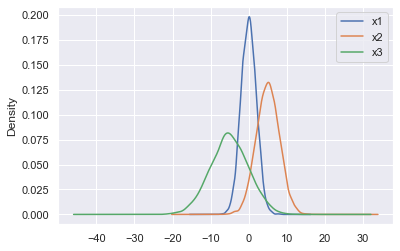

In [7]:
# plotting data

df.plot.kde()

In [8]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [9]:
data_tf = standardscaler.fit_transform(df)

In [10]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

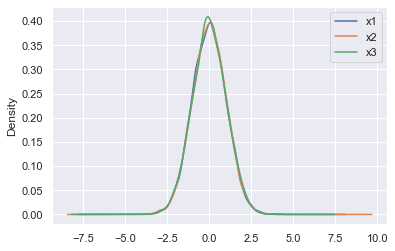

In [11]:
df.plot.kde()


# **MIN MAX SCALER**

In [12]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

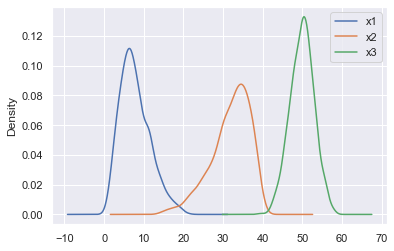

In [13]:
df.plot.kde()


In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

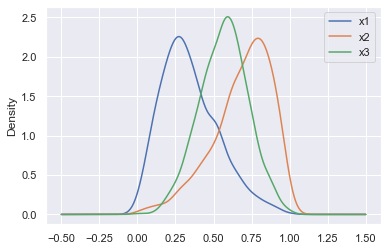

In [16]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

# **ROBUST SCALER**

In [17]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

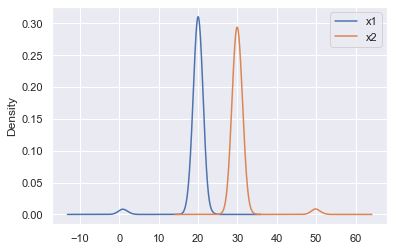

In [18]:
df.plot.kde()


In [19]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [20]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

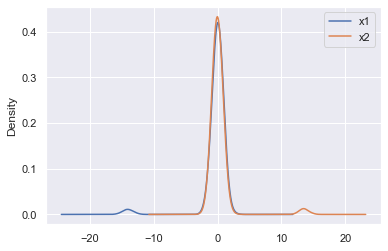

In [21]:
df.plot.kde()

# **NORMALIZER**

In [22]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})


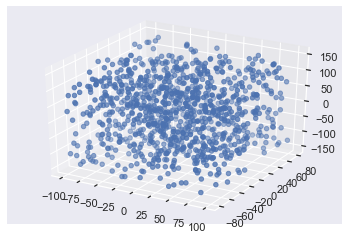

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [24]:
from sklearn.preprocessing import Normalizer


In [25]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [26]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])


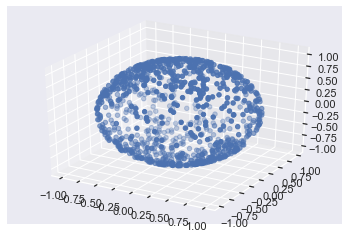

In [27]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)


# **BINARIZATION**

In [32]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [33]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=2)

In [34]:
data_tf = binarizer.fit_transform(X)

In [35]:
data_tf


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# **ENCODING CATEGORICAL VALUES**

## **ENCODING ORDINAL VALUES**

In [32]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [33]:
df


,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [34]:
df.Income.map({'Low':1,'Medium':2,'High':3})


0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

## **ENCODING NOMINAL VALUES**

In [35]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [36]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [38]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [39]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [40]:
df


,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [41]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

# **IMPUTATION**

In [10]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


In [12]:
imputer.fit_transform(df)

array([[1., 3.],
       [2., 4.],
       [3., 1.],
       [4., 4.],
       [1., 4.],
       [7., 5.]])

# **POLYNOMIAL FEATURES**

In [62]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [63]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [64]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

# **CUSTOM TRANSFORMER**

In [65]:
from sklearn.preprocessing import FunctionTransformer


In [66]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [67]:
customtransformer = FunctionTransformer(mapping, validate=False)


In [68]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [69]:
customtransformer.transform(df)


,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


# **TEXT PROCESSING**

## **COUNT VECTORIZER**

In [52]:
corpus = [
     'This is the first document awesome food.',
     
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.


In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [72]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [73]:
cv.vocabulary_


{'this': 12,
 'is': 6,
 'the': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 9,
 'and': 0,
 'third': 11,
 'one': 8,
 'mission': 7,
 'impossible': 5}

In [74]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [75]:
cv.vocabulary_

{'this': 10,
 'first': 3,
 'document': 2,
 'awesome': 1,
 'food': 4,
 'second': 8,
 'and': 0,
 'third': 9,
 'one': 7,
 'mission': 6,
 'impossible': 5}

In [76]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]], dtype=int64)

In [77]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

In [78]:
cv.vocabulary_

{'this': 28,
 'is': 10,
 'the': 21,
 'first': 6,
 'document': 4,
 'awesome': 2,
 'food': 8,
 'this is': 29,
 'is the': 12,
 'the first': 22,
 'first document': 7,
 'document awesome': 5,
 'awesome food': 3,
 'second': 18,
 'the second': 24,
 'second second': 20,
 'second document': 19,
 'and': 0,
 'third': 26,
 'one': 16,
 'mission': 14,
 'impossible': 9,
 'and the': 1,
 'the third': 25,
 'third one': 27,
 'one the': 17,
 'the is': 23,
 'is mission': 11,
 'mission impossible': 15,
 'is this': 13,
 'this the': 30}

## **Tlfdf VECTORIZER**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [54]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.57735027, 0.57735027, 0.57735027]])

In [55]:
vectorizer.get_feature_names()


['awesome', 'document', 'food']

## **HASHING VECTORIZER**

In [58]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [59]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447]])

## **IMAGE PROCESSING USING SKIMAGE**

In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skimage.io import imread,imshow

In [7]:
image = imread('pinkflower.jpg')

In [8]:
image.shape

(352, 552, 3)

In [9]:
image[0]

array([[ 80, 125,  94],
       [ 78, 127,  97],
       [ 76, 125,  96],
       ...,
       [110, 174, 140],
       [109, 173, 138],
       [106, 170, 135]], dtype=uint8)

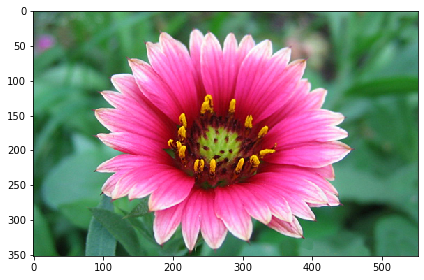

In [10]:
imshow(image)

In [11]:
from skimage.color import rgb2gray

In [12]:
rgb2gray(image).shape

(352, 552)

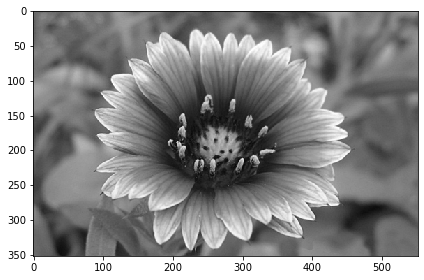

In [13]:
imshow(rgb2gray(image))

In [14]:
from skimage.transform import resize

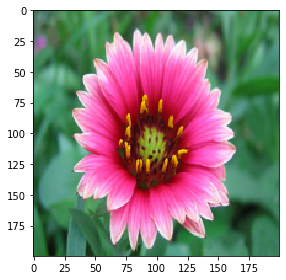

In [15]:
imshow(resize(image, (200,200)))

In [13]:
le = preprocessing.LabelEncoder()
>>> le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
>>> list(le.classes_)
['amsterdam', 'paris', 'tokyo']
>>> le.transform(["tokyo", "tokyo", "paris"])
array([2, 2, 1]...)
>>> list(le.inverse_transform([2, 2, 1]))
['tokyo', 'tokyo', 'paris']

SyntaxError: invalid syntax (<ipython-input-13-cdb2bf8cf1ea>, line 7)

In [14]:
le = preprocessing.LabelEncoder()

NameError: name 'preprocessing' is not defined

In [15]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
le.fit(["paris", "paris", "tokyo", "amsterdam"])

LabelEncoder()

In [20]:
list(le.classes_)

['amsterdam', 'paris', 'tokyo']

In [21]:
le.transform(["tokyo", "tokyo", "paris"])

array([2, 2, 1], dtype=int64)

In [22]:
list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']

In [51]:
from sklearn.feature_extraction import stop_words
 
print(stop_words.ENGLISH_STOP_WORDS)

frozenset({'ourselves', 'else', 'anyhow', 'thence', 'something', 'amount', 'serious', 'off', 'do', 'whether', 'among', 'whose', 'hers', 'seem', 'four', 'can', 'someone', 'not', 'then', 'who', 'fill', 'further', 'when', 'even', 'due', 'as', 'over', 'it', 'side', 'anyone', 'itself', 'here', 'beforehand', 'everyone', 'nowhere', 'now', 'each', 'everywhere', 'you', 'well', 'only', 'amongst', 'back', 'still', 'wherever', 'per', 'moreover', 'towards', 'eight', 'about', 'again', 'whoever', 'latter', 'elsewhere', 'thereafter', 'should', 'whither', 'thick', 'above', 'him', 'your', 'fire', 'yourselves', 'between', 'us', 'whereafter', 'rather', 'herself', 'has', 'meanwhile', 'becoming', 'mine', 'am', 'herein', 'system', 'thereupon', 'forty', 'below', 'so', 'several', 'sometimes', 'part', 'hence', 'hereafter', 'those', 'very', 'upon', 'find', 'move', 'wherein', 'cry', 'would', 'became', 'cannot', 'name', 'seemed', 'fifteen', 'me', 'behind', 'yet', 'through', 'thru', 'nobody', 'see', 'made', 'along'

C:\Users\chava\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
